In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from reframed import load_cbmodel

## Main results

In [2]:
df = pd.read_csv('../results/main_results.tsv', sep='\t')
df = df.query('test == "LP"')

In [3]:
models = {x: load_cbmodel(f'../models/{x}.xml.gz', flavor='bigg') for x in set(df['model'])}
lp_sizes = {x: len(models[x].reactions) for x in models}
df['size_lp'] = df['model'].apply(lambda x: lp_sizes[x])

In [4]:
solver_name = {
    'CPLEX_PY': 'cplex',
    'GUROBI': 'gurobi',
    'SCIP_CMD': 'scip',
    'HiGHS_CMD': 'highs',
    'GLPK_CMD': 'glpk',
    'COIN_CMD': 'coin',

}
df['solver'] = df['interface'].apply(lambda x: solver_name[x])

In [ ]:
df2 = pd.read_csv('../results/community_simulation.tsv', sep='\t')
df2 = df2.query('test == "LP" and time < 3600')
df2['solver'] = df2['interface'].apply(lambda x: solver_name[x])

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.lineplot(data=df, x="size_lp", y="time", hue="solver",  ax=ax1, estimator="median", errorbar=("pi", 50))

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xticks(list(lp_sizes.values()))
ax1.set_xticklabels(list(lp_sizes.values()))
ax1.set_xlabel('model size (# reactions)')
ax1.set_ylabel('time (sec)')
ax1.legend(loc=2, frameon=False)
ax1.set_title('a) single species FBA')

sns.lineplot(data=df2, x="size", y="time", hue="solver", ax=ax2, estimator="median", errorbar=("pi", 50))

ax2.set_yscale('log')
ax2.set_xticks(range(1,21))
ax2.set_xlabel('community size (# members)')
ax2.set_ylabel('time (sec)')

ax2.legend(loc=2, frameon=False)
ax2.set_title('b) microbial communities')

f.tight_layout()
f.savefig('../figures/results_lp.tiff', dpi=300)

## Compare LP method (communities)

In [22]:
df3 = pd.read_csv('../results/lp_methods.tsv', sep='\t')
df3['solver'] = df3['interface'].apply(lambda x: solver_name[x])

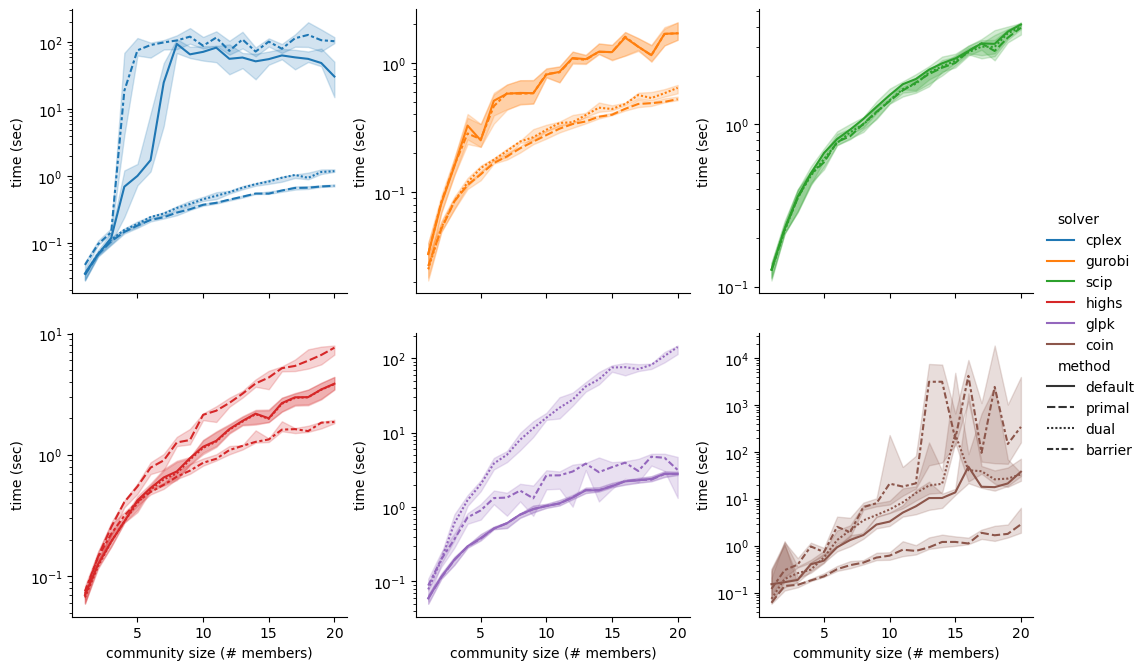

In [23]:
grid = sns.relplot(data=df3, kind='line', x="size", y="time", col='solver', col_wrap=3, hue='solver', style='method', 
                   col_order=['cplex', 'gurobi', 'scip', 'highs', 'glpk', 'coin'], 
                   hue_order=['cplex', 'gurobi', 'scip', 'highs', 'glpk', 'coin'],
                   style_order=['default', 'primal', 'dual', 'barrier'],
                   facet_kws={'sharey': False}, estimator="median", errorbar=("pi", 50), height=3.5)
grid.set(yscale = 'log',  xlabel='community size (# members)', ylabel='time (sec)', title=None)
plt.savefig('../figures/lp_methods.tiff', dpi=300)